# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Link to dataset](https://www.kaggle.com/code/dkurbatovv/heart-disease-regression/data)

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/BA476HeartDiseaseProject/heart_2020_cleaned.csv')
df2 = df.copy()
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Basic Preprocessing

Making Sex into binary numbers, every yes/no into binary numbers, and made age and health variables into metric variables

In [ ]:
df = df.replace('Male',1)
df = df.replace('Female',0)
df = df.replace('Yes', 1)
df = df.replace('No', 0)

#Making GenHealth metric variable
#Only values of GenHealth are 'Very good', 'Fair', 'Good', 'Poor', 'Excellent'
df = df.replace('Poor',0)
df = df.replace('Fair',1)
df = df.replace('Good',2)
df = df.replace('Very good',3)
df = df.replace('Excellent',4)
#consider one hot encoding

df = df.replace('18-24',0)
df = df.replace('25-29',1)
df = df.replace('30-34',2)
df = df.replace('35-39',3)
df = df.replace('40-44',4)
df = df.replace('45-49',5)
df = df.replace('50-54',6)
df = df.replace('55-59',7)
df = df.replace('60-64',8)
df = df.replace('65-69',9)
df = df.replace('70-74',10)
df = df.replace('75-79',11)
df = df.replace('80 or older',12)


# Descriptive Analytics

Histograms of variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d9b930450>,
      dtype=object)

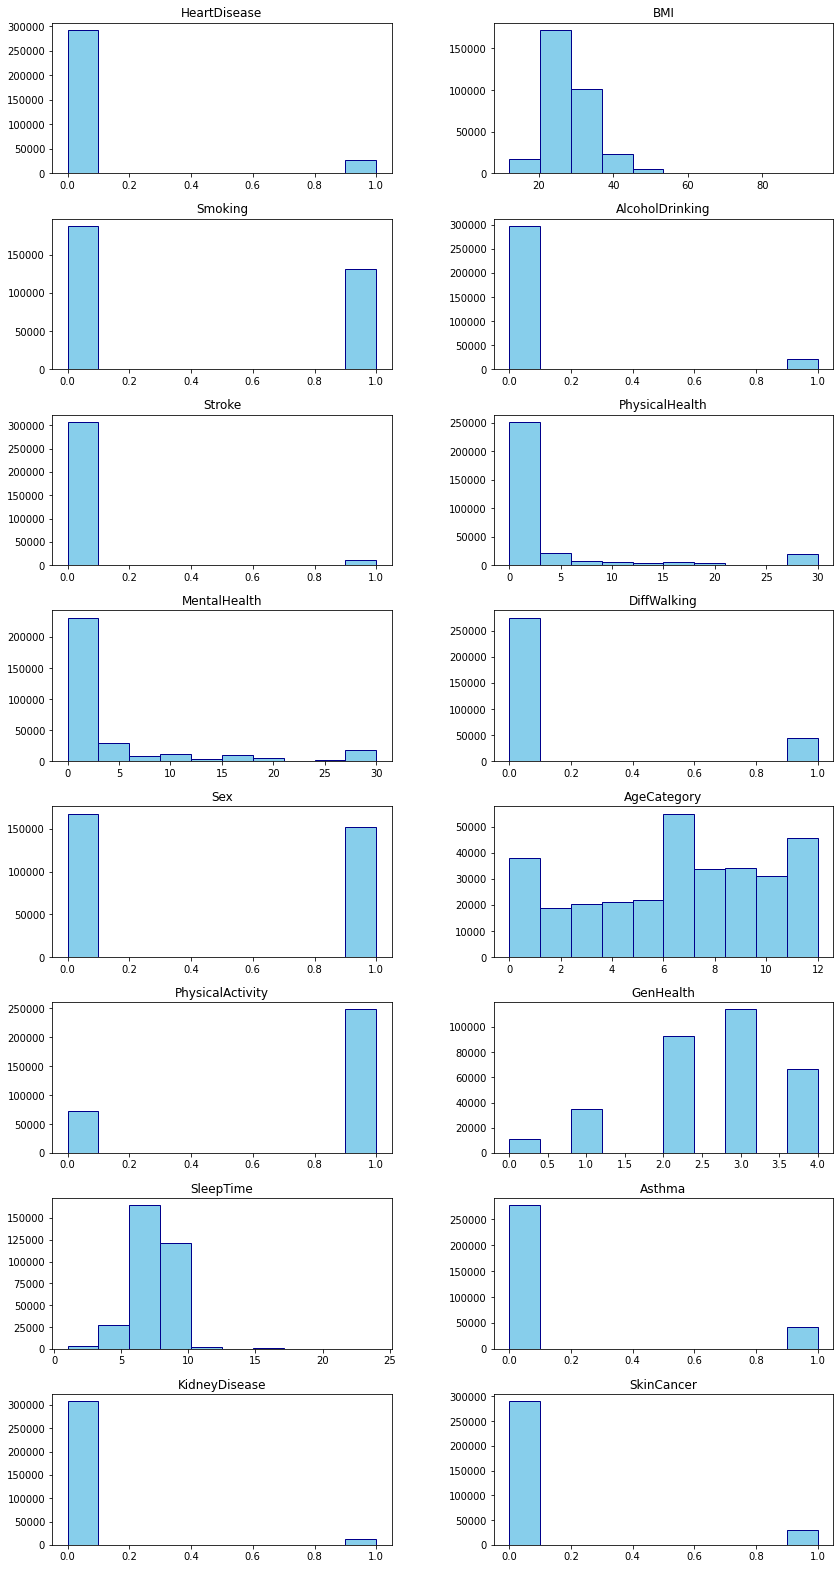

In [ ]:
fig, axis = plt.subplots(8,2,figsize=(14, 28))
df.hist(ax=axis, color = "skyblue", lw=1, ec="darkblue", grid=False)

Text(0, 0.5, 'Number of People')

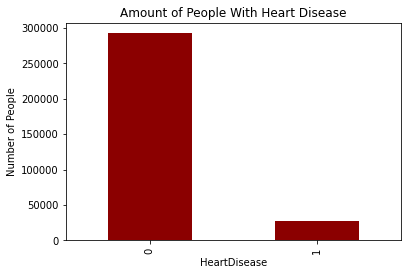

In [ ]:
heart = df.groupby(['HeartDisease']).size()
ax = heart.plot(kind='bar', color='darkred')
ax.set_title('Amount of People With Heart Disease')
ax.set_ylabel('Number of People')

Text(0.5, 1.0, 'Heart Disease Age Distribution')

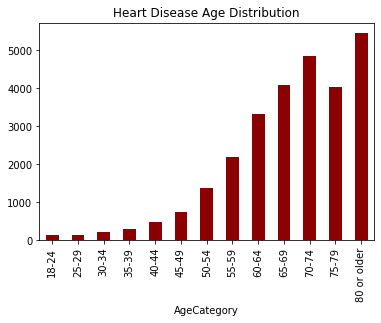

In [ ]:
yes_df = df2.loc[df['HeartDisease'] == 1]
age = yes_df.groupby(['AgeCategory']).size()
ax = age.plot(kind='bar', color='darkred')
ax.set_title('Heart Disease Age Distribution')

Text(0.5, 1.0, 'No Heart Disease Age Distribution')

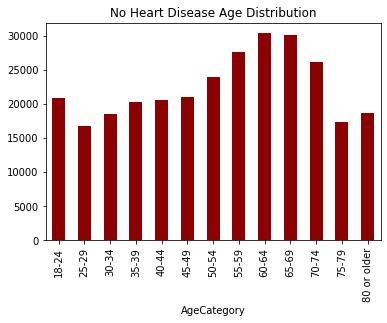

In [ ]:
yes_df = df2.loc[df['HeartDisease'] == 0]
age = yes_df.groupby(['AgeCategory']).size()
ax = age.plot(kind='bar', color='darkred')
ax.set_title('No Heart Disease Age Distribution')

# Data Preprocessing

Made dummies for race variable


In [ ]:
race_dummies = pd.get_dummies(df.Race)
df.drop(labels="Race", axis=1, inplace=True)
df = df.join(race_dummies)

## Normalize Data


In [ ]:
from sklearn.preprocessing import normalize


In [ ]:
df_copy = df.copy()
df_copy = df_copy.reset_index()
df_copy = df_copy.drop(columns = 'index')


In [ ]:
droplist = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
         'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'American Indian/Alaskan Native',
       'Asian', 'Black', 'Hispanic', 'Other', 'White']

df_drop = df_copy.drop(columns = droplist)

In [ ]:
df_array = df_drop.to_numpy()
df_array = normalize(df_array)
df_norm = pd.DataFrame(df_array, columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime', 'GenHealth'])

In [ ]:
for x in droplist:
  df_norm[x] = df_copy[x]
df=df_norm

## Handling unbalanced data

At the beginning, we set a baseline regression to measure the accuracy of a logistic regression on our data. The model performed at a outstanding rate of 92% but looking at our data, we recognized that this was due to unbalanced data as 90% of our data contained people without heart disease

First we tried resampling to make the data have 50% heart disease 50% no heart disease

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, classification_report

In [ ]:
df_yes = df.loc[df['HeartDisease'] == 1]
df_no = df.loc[df['HeartDisease'] == 0]
yes_amount = len(df_yes)
df_no = df_no.sample(n=yes_amount, random_state=1)
df_resample = pd.concat([df_yes,df_no])

In [ ]:
y = df_resample['HeartDisease']
X = df_resample.drop(['HeartDisease','Diabetic'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
#Instantiate 
fiftyfifty = LogisticRegression(max_iter=100000)

#Fit
fiftyfifty.fit(X_train, y_train)

#Predict
predictions = fiftyfifty.predict(X_test)

#Assess
standard_accuracy = accuracy_score(predictions,y_test)

print(standard_accuracy)

0.7610419026047565


In [ ]:
dfc = df.copy()
df = df.sample(n=50000, random_state=42)
#taking sample of 50,000 of full dataset to reduce time spent on models

y = df['HeartDisease']
X = df.drop(['HeartDisease','Diabetic'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3495
Before OverSampling, counts of label '0': 36505 

After OverSampling, the shape of train_X: (73010, 20)
After OverSampling, the shape of train_y: (73010,) 

After OverSampling, counts of label '1': 36505
After OverSampling, counts of label '0': 36505


Comparing logistic regression with full and partial dataset

In [ ]:
lr = LogisticRegression(max_iter=100000, penalty='none')
lr.fit(X_train_res, y_train_res)
lrlpredictions = lr.predict(X_test)
print('Accuracy score is: ', accuracy_score(y_test, lrlpredictions))
print()
print('Recall score is: ', recall_score(y_test, lrlpredictions))
print()
print('Classification Report')
print(classification_report(y_test, lrlpredictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, lrlpredictions))


Accuracy score is:  0.7305

Recall score is:  0.7993384785005513

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      9093
           1       0.22      0.80      0.35       907

    accuracy                           0.73     10000
   macro avg       0.60      0.76      0.59     10000
weighted avg       0.91      0.73      0.79     10000


Confusion Matrix
[[6580 2513]
 [ 182  725]]


Checking accuracy with full dataset

In [ ]:
y = dfc['HeartDisease']
X = dfc.drop(['HeartDisease','Diabetic'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
lr = LogisticRegression(max_iter=100000, penalty='none')
lr.fit(X_train_res, y_train_res)
lrlpredictions = lr.predict(X_test)



In [ ]:
#evaluate
print('Accuracy score is: ', accuracy_score(y_test, lrlpredictions))
print()
print('Recall score is: ', recall_score(y_test, lrlpredictions))
print()
print('Classification Report')
print(classification_report(y_test, lrlpredictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, lrlpredictions))

Accuracy score is:  0.7401147610187776

Recall score is:  0.7923862581244197

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58574
           1       0.22      0.79      0.34      5385

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959


Confusion Matrix
[[43070 15504]
 [ 1118  4267]]


1% accuracy increase deemed not worth it to use full sample

# Models

## Baseline

A model that simply predicts the majority class

In [ ]:
y = df['HeartDisease']
X = df.drop(['HeartDisease','Diabetic'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#find majority class
majority_class = df['HeartDisease'].mode()

#create prediction list
basepredict = np.zeros(y_test.shape[0])

#fill list with majority class
for x in range(len(basepredict)):
  basepredict[x] = majority_class



In [ ]:
#evaluate
print('Accuracy score is: ', accuracy_score(y_test, basepredict))
print()
print('Recall score is: ', recall_score(y_test, basepredict))
print()
print('Classification Report')
print(classification_report(y_test, basepredict, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, basepredict))


Accuracy score is:  0.9093

Recall score is:  0.0

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9093
           1       1.00      0.00      0.00       907

    accuracy                           0.91     10000
   macro avg       0.95      0.50      0.48     10000
weighted avg       0.92      0.91      0.87     10000


Confusion Matrix
[[9093    0]
 [ 907    0]]


In [ ]:
comparison=pd.DataFrame(columns=['ModelName', 'Accuracy', 'Recall'], index=(range(7)) )

modelnumber=0
comparison['ModelName'][modelnumber] = 'Baseline'
comparison['Accuracy'][modelnumber] = accuracy_score(y_test, basepredict)
comparison['Recall'][modelnumber] = recall_score(y_test, basepredict)


## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train_res, y_train_res)
lrlpredictions = lr.predict(X_test)                           

In [ ]:
#evaluate
print('Accuracy score is: ', accuracy_score(y_test, lrlpredictions))
print()
print('Recall score is: ', recall_score(y_test, lrlpredictions))
print()
print('Classification Report')
print(classification_report(y_test, lrlpredictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, lrlpredictions))

Accuracy score is:  0.7419

Recall score is:  0.7927232635060639

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      9093
           1       0.23      0.79      0.36       907

    accuracy                           0.74     10000
   macro avg       0.60      0.76      0.60     10000
weighted avg       0.91      0.74      0.79     10000


Confusion Matrix
[[6700 2393]
 [ 188  719]]


In [ ]:
modelnumber=1
comparison['ModelName'][modelnumber] = 'Logistic'
comparison['Accuracy'][modelnumber] = accuracy_score(y_test, lrlpredictions)
comparison['Recall'][modelnumber] = recall_score(y_test, lrlpredictions)

In [ ]:
coefficients = pd.DataFrame(zip(X.columns.tolist(), np.transpose(lr.coef_.tolist())), columns=['features', 'coef'])

print( lr.intercept_ )
for a in range( len(coefficients['coef'] )):
  coefficients['coef'][a] = coefficients['coef'][a][0]

# from google.colab import files
# coefficients.to_excel('coef.xlsx')
# files.download('coef.xlsx')

[5.47893733]


##Lasso, Ridge and Elastic Net

### Lasso Penalty

Tuning Penalty Strength 

We first used GridSearchCV to find optimum penalty value but realized it was much faster to compute the accuracy for the set of C_values since we only had one parameter we were testing

In [ ]:
from sklearn.metrics import accuracy_score
c_values = [1, 0.1, 0.01, 0.001, 0.0001]

for i in c_values:   
  lasso = LogisticRegression(max_iter=100000, penalty='l1', solver='saga', C= i)
  lasso.fit(X_train_res, y_train_res.ravel())
    
    
  lassopredictions = lasso.predict(X_test)
  lassostandard_accuracy = accuracy_score(y_test, lassopredictions)
  print(lassostandard_accuracy)

0.7419
0.7417
0.7387
0.729
0.6507


In [ ]:
lasso = LogisticRegression(penalty='l1', solver='saga', C=1)
lasso.fit(X_train_res, y_train_res.ravel())
lassopredictions = lasso.predict(X_test)

In [ ]:
#evaluate
print('Accuracy score is: ', accuracy_score(y_test, lassopredictions))
print()
print('Recall score is: ', recall_score(y_test, lassopredictions))
print()
print('Classification Report')
print(classification_report(y_test, lassopredictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, lassopredictions))


Accuracy score is:  0.7419

Recall score is:  0.7927232635060639

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      9093
           1       0.23      0.79      0.36       907

    accuracy                           0.74     10000
   macro avg       0.60      0.76      0.60     10000
weighted avg       0.91      0.74      0.79     10000


Confusion Matrix
[[6700 2393]
 [ 188  719]]


In [ ]:
modelnumber=2
comparison['ModelName'][modelnumber] = 'Lasso'
comparison['Accuracy'][modelnumber] = accuracy_score(y_test, lassopredictions)
comparison['Recall'][modelnumber] = recall_score(y_test, lassopredictions)

In [ ]:
from sklearn.model_selection import cross_val_score
scores=1
#scores = cross_val_score(lasso, X_train_res, y_train_res.ravel(), cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores 1


### Ridge Penalty

Tuning Penalty Strength 

In [ ]:
from sklearn.metrics import accuracy_score
c_values = [1, 0.1, 0.01, 0.001, 0.0001]

for i in c_values:   
  ridge = LogisticRegression(max_iter=100000,penalty='l2', solver='saga', C= i)
  ridge.fit(X_train_res, y_train_res.ravel())
    
    
  ridgepredictions = ridge.predict(X_test)
  ridgestandard_accuracy = accuracy_score(y_test, ridgepredictions)
  print(ridgestandard_accuracy)

0.7419
0.7396
0.7317
0.7193
0.6927


In [ ]:
ridge = LogisticRegression(max_iter=100000, penalty='l2', solver='saga', C=1)
ridge.fit(X_train_res, y_train_res.ravel())

ridgepredictions = ridge.predict(X_test)


In [ ]:
#evaluate
print('Accuracy score is: ', accuracy_score(y_test, ridgepredictions))
print()
print('Recall score is: ', recall_score(y_test, ridgepredictions))
print()
print('Classification Report')
print(classification_report(y_test, ridgepredictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, ridgepredictions))


Accuracy score is:  0.7419

Recall score is:  0.7927232635060639

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      9093
           1       0.23      0.79      0.36       907

    accuracy                           0.74     10000
   macro avg       0.60      0.76      0.60     10000
weighted avg       0.91      0.74      0.79     10000


Confusion Matrix
[[6700 2393]
 [ 188  719]]


In [ ]:
modelnumber=3
comparison['ModelName'][modelnumber] = 'Ridge'
comparison['Accuracy'][modelnumber] = accuracy_score(y_test, ridgepredictions)
comparison['Recall'][modelnumber] = recall_score(y_test, ridgepredictions)

In [ ]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(ridge, X_train_res, y_train_res.ravel(), cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores 1


### Elastic Net Penalty

Tuning Penalty Strength 

In [ ]:
from sklearn.metrics import accuracy_score
l1ratio = [.1,.25,.5,.75,1]

for i in l1ratio:   
  elasticnet = LogisticRegression(max_iter=100000,penalty='elasticnet', solver='saga', l1_ratio= i)
  elasticnet.fit(X_train_res, y_train_res.ravel())
    
    
  elasticnetpredictions = elasticnet.predict(X_test)
  elasticnetstandard_accuracy = accuracy_score(y_test, elasticnetpredictions)
  print(elasticnetstandard_accuracy)

0.7418
0.742
0.7419
0.7417
0.7419


In [ ]:
elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=.25)
elasticnet.fit(X_train_res, y_train_res.ravel())
elasticnetpredictions = elasticnet.predict(X_test)

In [ ]:
#evaluate
print('Accuracy score is: ', accuracy_score(y_test, elasticnetpredictions))
print()
print(confusion_matrix(y_test, elasticnetpredictions))
print()
print('Recall score is: ', recall_score(y_test, elasticnetpredictions))
print('Classification Report')
print(classification_report(y_test, elasticnetpredictions, zero_division=True))
print()
print('Confusion Matrix')


Accuracy score is:  0.742

[[6701 2392]
 [ 188  719]]

Recall score is:  0.7927232635060639
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      9093
           1       0.23      0.79      0.36       907

    accuracy                           0.74     10000
   macro avg       0.60      0.76      0.60     10000
weighted avg       0.91      0.74      0.79     10000


Confusion Matrix


In [ ]:
modelnumber=4
comparison['ModelName'][modelnumber] = 'Elastic Net'
comparison['Accuracy'][modelnumber] = accuracy_score(y_test, elasticnetpredictions)
comparison['Recall'][modelnumber] = recall_score(y_test, elasticnetpredictions)

In [ ]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(elasticnet, X_train_res, y_train_res.ravel(), cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores 1


## Naive Bayes

In [ ]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train_res, y_train_res)
predictions = gnb.predict(X_test)

#evaluate
print('Accuracy score is: ', accuracy_score(y_test, predictions))
print()
print('Recall score is: ', recall_score(y_test, predictions))
print()
print('Classification Report')
print(classification_report(y_test, predictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))

Accuracy score is:  0.7713

Recall score is:  0.6163175303197354

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      9093
           1       0.22      0.62      0.33       907

    accuracy                           0.77     10000
   macro avg       0.59      0.70      0.60     10000
weighted avg       0.89      0.77      0.81     10000


Confusion Matrix
[[7154 1939]
 [ 348  559]]


In [ ]:
modelnumber=5
comparison['ModelName'][modelnumber] = 'Naive_Bayes'
comparison['Accuracy'][modelnumber] = accuracy_score(y_test, predictions)
comparison['Recall'][modelnumber] = recall_score(y_test, predictions)

## Random Forest

###Random forest before tuning parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=5)
rf.fit(X_train_res, y_train_res)
predictions = rf.predict(X_test)



In [ ]:
#evaluate
print('Accuracy score is: ', accuracy_score(y_test, predictions))
print()
print('Recall score is: ', recall_score(y_test, predictions))
print()
print('Classification Report')
print(classification_report(y_test, predictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))

Accuracy score is:  0.6892

Recall score is:  0.8180815876515987

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      9093
           1       0.20      0.82      0.32       907

    accuracy                           0.69     10000
   macro avg       0.59      0.75      0.56     10000
weighted avg       0.90      0.69      0.76     10000


Confusion Matrix
[[6150 2943]
 [ 165  742]]


###Tuning Hyperparameters

In [ ]:
#parameters to tune
num_tree = [x*2 for x in range(1,12)]
amount_tree = len(num_tree)

depth = [x*4 for x in range(1,15)]
amount_depth = len(depth)

In [ ]:
# instantiate lists
y_test_hat_rf_num_tree = np.zeros((amount_tree, y_test.shape[0]))
y_train_hat_rf_num_tree = np.zeros((amount_tree, y_train_res.shape[0]))
feature_importances_rf_num_tree = np.zeros((amount_tree, X_train_res.shape[1]))

#y_train_hat_rf_depth = np.zeros((amount_depth, y_train_res.shape[0]))
y_test_hat_rf_depth  = np.zeros((amount_depth, y_test.shape[0]))
y_train_hat_rf_depth = np.zeros((amount_depth, y_train_res.shape[0]))
feature_importances_rf_depth  = np.zeros((amount_depth, X_train_res.shape[1]))

Tuning max_depth

In [ ]:
print('\r', int(0), '% complete', end='')
for i, dep in enumerate(depth):
  rf = RandomForestClassifier(n_estimators = 4, max_depth=dep, max_features='auto', random_state=42)

  rf.fit(X_train_res, y_train_res)
  rf_y_train = rf.predict(X_train_res) #Predict
  rf_y_test = rf.predict(X_test)

  y_train_hat_rf_depth[i] = rf_y_train
  y_test_hat_rf_depth[i] = rf_y_test
  feature_importances_rf_depth[i] = rf.feature_importances_

  print('\r', int(((i+1) / amount_depth)*100), '% complete', end='')

print('\r', int(100), '% complete', end='')

 100 % complete

In [ ]:
#Calculate accuracy
rf_test_accuracy_depth = []
rf_train_accuracy_depth = []
for x in range(amount_depth):
  rf_test_accuracy_depth.append(accuracy_score(y_test_hat_rf_depth[x],y_test))
  rf_train_accuracy_depth.append(accuracy_score(y_train_hat_rf_depth[x],y_train_res))

In [ ]:
#calculate highest accuracy
max_acc_rf_depth = max(rf_test_accuracy_depth)
mindex_rf_depth = rf_test_accuracy_depth.index(max_acc_rf_depth)
print(depth[mindex_rf_depth])

56


0.9539


<Figure size 432x288 with 0 Axes>

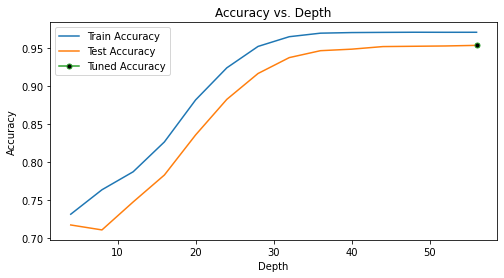

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.figure(1)
plt.figure(figsize = (8,4)) 
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Depth')
plt.plot(depth,rf_train_accuracy_depth, label='Train Accuracy')
plt.plot(depth,rf_test_accuracy_depth, label='Test Accuracy')
plt.plot(depth[mindex_rf_depth], max_acc_rf_depth, marker="o", markersize=5, label='Tuned Accuracy', markerfacecolor='black')
plt.legend()
print(max_acc_rf_depth)

Tuning Number of Trees

In [ ]:
print('\r', int(0), '% complete', end='')
for i, tree_count in enumerate(num_tree):
  rf = RandomForestClassifier(n_estimators = tree_count, max_depth=40, max_features='auto', random_state=42)

  rf.fit(X_train_res, y_train_res)
  rf_y_train = rf.predict(X_train_res) #Predict
  rf_y_test = rf.predict(X_test)

  y_train_hat_rf_num_tree[i] = rf_y_train
  y_test_hat_rf_num_tree[i] = rf_y_test
  feature_importances_rf_num_tree[i] = rf.feature_importances_

  print('\r', int(((i+1) / amount_tree)*100), '% complete', end='')

print('\r', int(100), '% complete', end='')

 100 % complete

In [ ]:
#Calculate accuracy
rf_test_accuracy_numtree = []
rf_train_accuracy_numtree = []
for x in range(amount_tree):
  rf_test_accuracy_numtree.append(accuracy_score(y_test_hat_rf_num_tree[x],y_test))
  rf_train_accuracy_numtree.append(accuracy_score(y_train_hat_rf_num_tree[x],y_train_res))

In [ ]:
#calculate highest accuracy
max_acc_rf_numtree = max(rf_test_accuracy_numtree)
mindex_rf_numtree = rf_test_accuracy_numtree.index(max_acc_rf_numtree)
num_tree[mindex_rf_numtree]

18

0.9599


<Figure size 432x288 with 0 Axes>

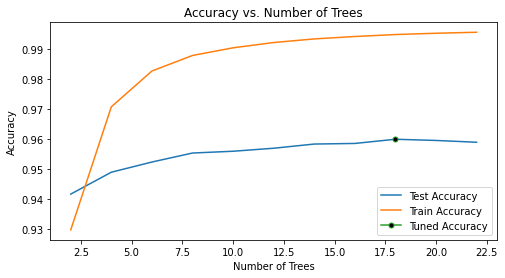

In [ ]:
#plot accuracy
plt.figure(1)
plt.figure(figsize = (8,4)) 
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.plot(num_tree,rf_test_accuracy_numtree, label='Test Accuracy')
plt.plot(num_tree,rf_train_accuracy_numtree, label='Train Accuracy')
plt.plot(num_tree[mindex_rf_numtree], max_acc_rf_numtree, marker="o", markersize=5, label='Tuned Accuracy', markerfacecolor='black')
plt.legend()
print(max_acc_rf_numtree)


###Visualizing features by importance

In [ ]:
#retrieve features
coeff_names = X_train.columns.to_list()
feature_names = X_train.columns.to_list()
feature_importances_rf_best_num_tree = feature_importances_rf_num_tree[mindex_rf_numtree]
feature_importances_rf_dict_num_tree = {}
for x in range(len(coeff_names)):
  feature_importances_rf_dict_num_tree[coeff_names[x]] = round(feature_importances_rf_best_num_tree[x], 2)

In [ ]:
#sort importance
coeff_names = X_train.columns.to_list()
feature_importances_rf_best = feature_importances_rf_best_num_tree
df_importance = pd.DataFrame(columns = ['Features', 'Importance'])
df_importance['Features'] = coeff_names
df_importance['Importance'] = feature_importances_rf_best
df_importance = df_importance.sort_values('Importance', ascending = False)
coeff_names = df_importance['Features'].to_list() 
feature_importances_rf_best = df_importance['Importance'].to_list() 

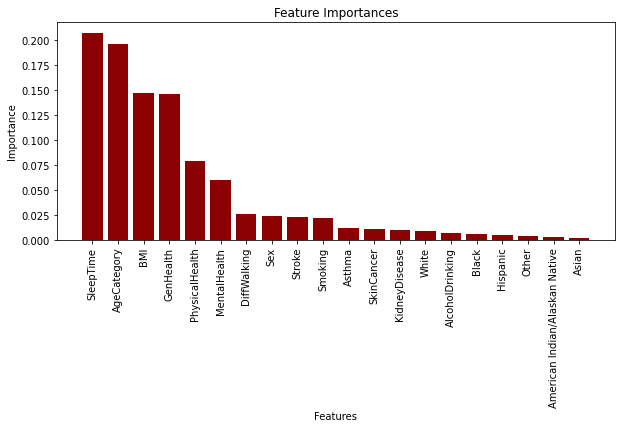

In [ ]:
#plot importance
x_values = list(range(len(feature_importances_rf_best)))
plt.figure(1,figsize = (10,4))
plt.bar(x_values, feature_importances_rf_best, orientation = 'vertical', color='darkred')
plt.xticks(x_values, coeff_names, rotation=90) 
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Feature Importances');

###Final Random Forest Model

In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=40, n_estimators=2)
rf.fit(X_train_res, y_train_res)
forestpredictions = rf.predict(X_test)


In [ ]:
#Evaluate
print('Accuracy score is: ', accuracy_score(forestpredictions,y_test))
print()
print('Recall score is: ', recall_score(y_test, forestpredictions))
print()
print('Classification Report')
print(classification_report(y_test, forestpredictions, zero_division=True))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, forestpredictions))

Accuracy score is:  0.9416

Recall score is:  0.7078280044101434

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9093
           1       0.67      0.71      0.69       907

    accuracy                           0.94     10000
   macro avg       0.82      0.84      0.83     10000
weighted avg       0.94      0.94      0.94     10000


Confusion Matrix
[[8774  319]
 [ 265  642]]


In [ ]:
modelnumber=6
comparison['ModelName'][modelnumber] = 'Random Forest'
comparison['Accuracy'][modelnumber] = accuracy_score(y_test, predictions)
comparison['Recall'][modelnumber] = recall_score(y_test, predictions)

(0.5, 0.954765)

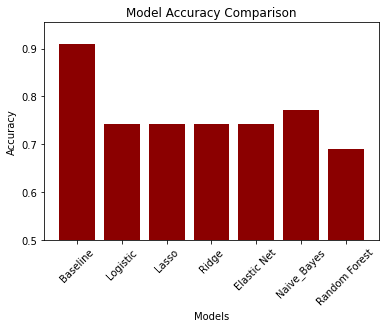

In [ ]:
plt.figure(1)
plt.bar(comparison['ModelName'], comparison['Accuracy'], color='darkred')
plt.xticks(rotation=45) 
# Axis labels and title
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison')
plt.ylim(.5)

(0.5, 0.8589856670341786)

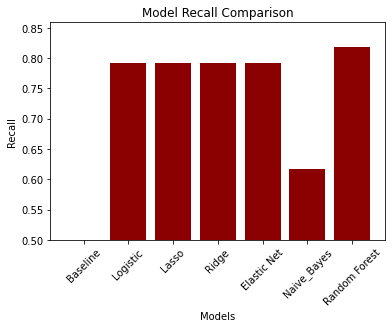

In [ ]:
plt.figure(1)
plt.bar(comparison['ModelName'], comparison['Recall'], color='darkred')
plt.xticks(rotation=45) 
# Axis labels and title
plt.ylabel('Recall')
plt.xlabel('Models')
plt.title('Model Recall Comparison')
plt.ylim(.5)